In [34]:
from astropy.table import Table, join, Column, setdiff
from astropy import units as u
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, NullFormatter
%matplotlib inline
%config InlineBackend.figure_format = "svg"

from my_progs.catalog.read_icrf import read_icrf2

In [2]:
r2o = Table.read("../data/postfit-r2o-offset.fits")
sitab = Table.read("../data/SI.fits")

r2o = join(r2o, sitab, keys="iers_name", join_type="left")

r2o["ang_sep_g1"].format = "%.2f"
r2o["ang_sep_k_g1"].format = "%.2f"
r2o["ang_sep_ka_g1"].format = "%.2f"
r2o["SI"].format = "%.2f"

In [3]:
makarov2016 = Table.read("../data/makarov-2016.txt", 
                         format="ascii.fixed_width_no_header",
                         col_starts=[14, 80, 91],
                         col_ends=[30, 82, 122], 
                         names=["icrf_name", "MType", "Notes"])

icrf2 = read_icrf2()
icrf2.keep_columns(["icrf_name", "iers_name"])

makarov2016 = join(makarov2016, icrf2, keys="icrf_name", join_type="left")
makarov2016.remove_column("icrf_name")

r2o = join(r2o, makarov2016, keys="iers_name", join_type="left")

In [4]:
# X-G vs K-G
xg_kg = r2o["ang_sep_g1"] / r2o["ang_sep_k_g1"]
xkdif = np.fabs(r2o["ang_sep_g1"] - r2o["ang_sep_k_g1"])

# X-G vs Ka-G
xg_kag = r2o["ang_sep_g1"] / r2o["ang_sep_ka_g1"]
xkadif = np.fabs(r2o["ang_sep_g1"] - r2o["ang_sep_ka_g1"])

# K-G vs Ka-G
kg_kag = r2o["ang_sep_k_g1"] / r2o["ang_sep_ka_g1"]
kkadif = np.fabs(r2o["ang_sep_k_g1"] - r2o["ang_sep_ka_g1"])

Check the ratio of optical-radio offset measured at different bands.

# 1 Absolute difference of optical-radio offset

In [22]:
xg1, xg2, xg3 = np.percentile(r2o["ang_sep_g1"], [5, 50, 95])
# kag1, kag2, kag3 = np.percentile(r2o["ang_sep_ka_g1"], [25, 50, 75])

xg1, xg2, xg3

(0.0771581954042081, 0.4085580654595746, 2.061368819940471)

In [29]:
kg1, kg2, kg3 = np.percentile(r2o["ang_sep_k_g1"], [5, 50, 95])
# kg1, kg2, kg3 = np.percentile(r2o["ang_sep_k_g1"], [25, 50, 75])

kg1, kg2, kg3

(0.08778972871738176, 0.3957348834267821, 2.0143263888989225)

In [27]:
kag1, kag2, kag3 = np.percentile(r2o["ang_sep_ka_g1"], [5, 50, 95])
# kag1, kag2, kag3 = np.percentile(r2o["ang_sep_ka_g1"], [25, 50, 75])

kag1, kag2, kag3

(0.09083025733212888, 0.4267733898676406, 2.1548616640616443)

In [30]:
xmin, xmax = 0.9, 2

## 1.1 $|\rho_{XG} - \rho_{KG}|$

There are 8 sources with |rho_x_g - rho_k_g| > 1.
iers_name ang_sep_g1 ang_sep_k_g1 ang_sep_ka_g1  SI  MType Notes
                         mas           mas                      
--------- ---------- ------------ ------------- ---- ----- -----
 0010-401       0.17         1.50          0.64   --    --    --
 0430-332       0.47         1.71          0.60   --    --    --
 0700-465       1.67         0.06          0.79 2.18    --    --
 0723-008       1.38         0.23          0.66   --    --    --
 0918-534       1.33         0.17          0.62   --    --    --
 1157-215       3.97         1.69          0.48   --    AQ     *
 1829-207       2.15         3.29          3.10 4.98    --    --
 2134+004       1.41         0.35          0.07   --    --    --
There are 385 sources with |rho_x_g - rho_k_g| < 0.2.
There are 268 sources with |rho_x_g - rho_k_g| < 0.1.
Up limit is 0.53


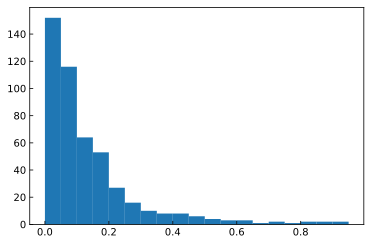

In [36]:
bins = np.arange(0, 1, 0.05)
plt.hist(xkdif, bins=bins)

mask = xkdif > 1
print("There are {:d} sources with |rho_x_g - rho_k_g| > 1.".format(len(xkdif[mask])))
print(r2o[mask]["iers_name", "ang_sep_g1", "ang_sep_k_g1", "ang_sep_ka_g1", "SI", "MType", "Notes"])

mask = xkdif < 0.2
print("There are {:d} sources with |rho_x_g - rho_k_g| < 0.2.".format(len(xkdif[mask])))
mask = xkdif < 0.1
print("There are {:d} sources with |rho_x_g - rho_k_g| < 0.1.".format(len(xkdif[mask])))

x = np.percentile(xkdif, 95)
print("Up limit is {:.2f}".format(x))

## 1.2 $|\rho_{XG} - \rho_{KaG}|$

There are 6 sources with |rho_x_g - rho_ka_g| > 1.
iers_name ang_sep_g1 ang_sep_k_g1 ang_sep_ka_g1  SI  MType Notes
                         mas           mas                      
--------- ---------- ------------ ------------- ---- ----- -----
 1157-215       3.97         1.69          0.48   --    AQ     *
 1315-058       0.34         0.31         13.60   --    --    --
 1437+374       0.54         0.29          2.52   --    --    --
 1454-060       0.57         0.67          2.13 3.54    --    --
 1657-562       1.47         2.00          3.48   --     V    --
 2134+004       1.41         0.35          0.07   --    --    --
There are 359 sources with |rho_x_g - rho_k_g| < 0.2.
There are 247 sources with |rho_x_g - rho_k_g| < 0.1.
Up limit is 0.54


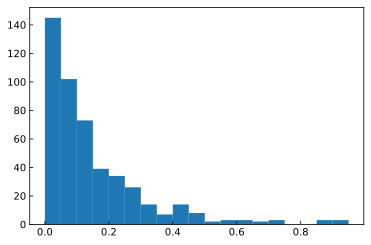

In [38]:
bins = np.arange(0, 1, 0.05)
plt.hist(xkadif, bins=bins)

mask = xkadif > 1
print("There are {:d} sources with |rho_x_g - rho_ka_g| > 1.".format(len(xkdif[mask])))
print(r2o[mask]["iers_name", "ang_sep_g1", "ang_sep_k_g1", "ang_sep_ka_g1", "SI", "MType", "Notes"])

mask = xkadif < 0.2
print("There are {:d} sources with |rho_x_g - rho_k_g| < 0.2.".format(len(xkdif[mask])))
mask = xkadif < 0.1
print("There are {:d} sources with |rho_x_g - rho_k_g| < 0.1.".format(len(xkdif[mask])))

x = np.percentile(xkadif, 95)
print("Up limit is {:.2f}".format(x))

## 1.3 $|\rho_{KG} - \rho_{KaG}|$

There are 6 sources with |rho_x_g - rho_ka_g| > 1.
iers_name ang_sep_g1 ang_sep_k_g1 ang_sep_ka_g1  SI  MType Notes
                         mas           mas                      
--------- ---------- ------------ ------------- ---- ----- -----
 0430-332       0.47         1.71          0.60   --    --    --
 1157-215       3.97         1.69          0.48   --    AQ     *
 1315-058       0.34         0.31         13.60   --    --    --
 1437+374       0.54         0.29          2.52   --    --    --
 1454-060       0.57         0.67          2.13 3.54    --    --
 1657-562       1.47         2.00          3.48   --     V    --
There are 376 sources with |rho_x_g - rho_k_g| < 0.2.
There are 254 sources with |rho_x_g - rho_k_g| < 0.1.
Up limit is 0.51


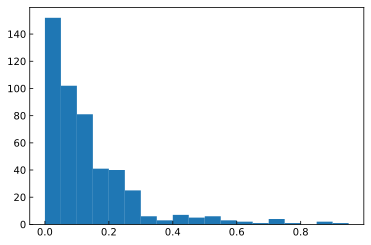

In [39]:
bins = np.arange(0, 1, 0.05)
plt.hist(kkadif, bins=bins)

mask = kkadif > 1
print("There are {:d} sources with |rho_x_g - rho_ka_g| > 1.".format(len(xkdif[mask])))
print(r2o[mask]["iers_name", "ang_sep_g1", "ang_sep_k_g1", "ang_sep_ka_g1", "SI", "MType", "Notes"])

mask = kkadif < 0.2
print("There are {:d} sources with |rho_x_g - rho_k_g| < 0.2.".format(len(xkdif[mask])))
mask = kkadif < 0.1
print("There are {:d} sources with |rho_x_g - rho_k_g| < 0.1.".format(len(xkdif[mask])))

x = np.percentile(kkadif, 95)
print("Up limit is {:.2f}".format(x))

In [8]:
mask = ((kkadif < 0.1)
        &(xkadif < 0.1)
        &(xkdif < 0.1))
print("There are {:d} sources with |rho_x_g - rho_k_g| < 0.1.".format(len(xkdif[mask])))

mask = ((kkadif < 0.2)
        &(xkadif < 0.2)
        &(xkdif < 0.2))
print("There are {:d} sources with |rho_x_g - rho_k_g| < 0.2.".format(len(xkdif[mask])))

mask = ((kkadif < 0.5)
        &(xkadif < 0.5)
        &(xkdif < 0.5))
print("There are {:d} sources with |rho_x_g - rho_k_g| < 0.5.".format(len(xkdif[mask])))

There are 144 sources with |rho_x_g - rho_k_g| < 0.1.
There are 294 sources with |rho_x_g - rho_k_g| < 0.2.
There are 443 sources with |rho_x_g - rho_k_g| < 0.5.


# Ratio of optical-radio offsets

## 2.1 $\rho_{XG} / \rho_{KG}$

There are 8 sources with rho_x_g / rho_k_g > 1.2.
iers_name ang_sep_g1 ang_sep_k_g1 ang_sep_ka_g1  SI  MType Notes
                         mas           mas                      
--------- ---------- ------------ ------------- ---- ----- -----
 0106+315       0.50         0.07          0.13   --    --    --
 0403-132       0.33         0.07          0.41   --    --    --
 0700-465       1.67         0.06          0.79 2.18    --    --
 0723-008       1.38         0.23          0.66   --    --    --
 0918-534       1.33         0.17          0.62   --    --    --
 1115-122       0.50         0.09          0.22   --    --    --
 1341-171       0.58         0.11          0.37 2.33    --    --
 1743+173       0.42         0.06          0.36 2.51    --    --


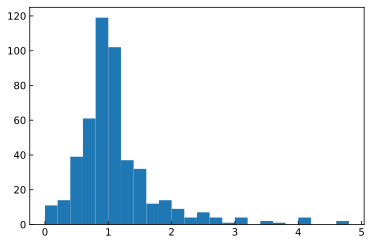

In [9]:
# bins = np.arange(0, 12, 0.2)
bins = np.arange(0, 5, 0.2)
plt.hist(xg_kg, bins=bins)

mask = xg_kg > 5
print("There are {:d} sources with rho_x_g / rho_k_g > 1.2.".format(len(xg_kg[mask])))
print(r2o[mask]["iers_name", "ang_sep_g1", "ang_sep_k_g1", "ang_sep_ka_g1", "SI", "MType", "Notes"])

## 1.2 $\rho_{XG} / \rho_{KaG}$

There are 11 sources with rho_x_g / rho_ka_g > 1.2.
iers_name ang_sep_g1 ang_sep_k_g1 ang_sep_ka_g1  SI  MType Notes
                         mas           mas                      
--------- ---------- ------------ ------------- ---- ----- -----
 0112-017       0.69         0.17          0.09   --    --    --
 0336-019       0.07         0.11          0.01 2.64    --    --
 0629-418       1.12         0.45          0.20   --    --    --
 0743-006       0.98         0.64          0.13 3.30    --    --
 0917+449       0.33         0.11          0.04   --    --    --
 1143-287       0.53         0.30          0.08   --    --    --
 1157-215       3.97         1.69          0.48   --    AQ     *
 1307-556       0.81         0.23          0.15   --    --    --
 2134+004       1.41         0.35          0.07   --    --    --
 2245-328       0.36         0.22          0.07   --    --    --
 2354-021       0.31         0.15          0.03   --    --    --


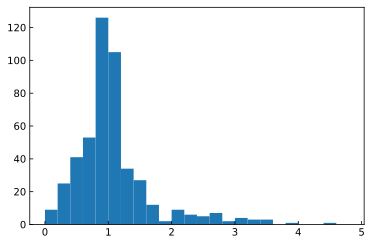

In [10]:
# bins = np.arange(0, 12, 0.2)
bins = np.arange(0, 5, 0.2)
plt.hist(xg_kag, bins=bins)

mask = xg_kag > 5
print("There are {:d} sources with rho_x_g / rho_ka_g > 1.2.".format(len(xg_kag[mask])))
print(r2o[mask]["iers_name", "ang_sep_g1", "ang_sep_k_g1", "ang_sep_ka_g1", "SI", "MType", "Notes"])

## 1.3 $\rho_{KG} / \rho_{KaG}$

There are 3 sources with rho_k_g / rho_ka_g > 1.2.
iers_name ang_sep_g1 ang_sep_k_g1 ang_sep_ka_g1  SI  MType Notes
                         mas           mas                      
--------- ---------- ------------ ------------- ---- ----- -----
 0306+102       0.12         0.29          0.03   --    --    --
 0336-019       0.07         0.11          0.01 2.64    --    --
 1611-710       0.24         1.01          0.09   --    --    --


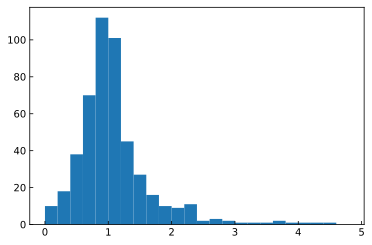

In [11]:
# bins = np.arange(0, 12, 0.2)
bins = np.arange(0, 5, 0.2)
plt.hist(kg_kag, bins=bins)

mask = kg_kag > 5
print("There are {:d} sources with rho_k_g / rho_ka_g > 1.2.".format(len(kg_kag[mask])))
print(r2o[mask]["iers_name", "ang_sep_g1", "ang_sep_k_g1", "ang_sep_ka_g1", "SI", "MType", "Notes"])

[0.05, 20, 0.05, 20]

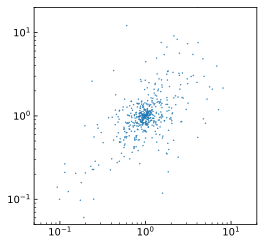

In [12]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(xg_kg, xg_kag, ".", ms=1)
ax.set_xscale("log")
ax.set_yscale("log")

xmin, xmax = 0.05, 20
ax.axis([xmin, xmax, xmin, xmax])

[0.018, 20, 0.018, 20]

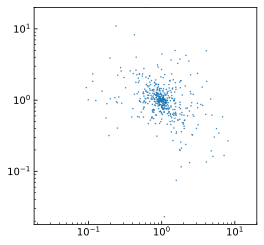

In [13]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(xg_kg, kg_kag, ".", ms=1)
ax.set_xscale("log")
ax.set_yscale("log")

xmin, xmax = 0.018, 20
ax.axis([xmin, xmax, xmin, xmax])

[0.01, 20, 0.01, 20]

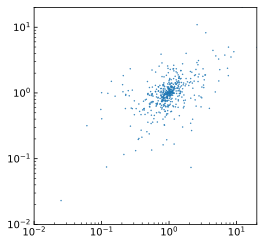

In [14]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(xg_kag, kg_kag, ".", ms=1)
ax.set_xscale("log")
ax.set_yscale("log")

xmin, xmax = 0.01, 20
ax.axis([xmin, xmax, xmin, xmax])

For the case that K, Ka, and Gaia observe one core while X observes another one.

In [15]:
mask = (xkdif > 1)& (kkadif < 0.5)
test1 = r2o[mask]

print("There are {:d} sources with |rho_x_g - rho_k_g| > 1 mas and |rho_x_g - rho_k_g| < 0.2 mas".format(len(xkdif[mask])))
print(r2o[mask]["iers_name", "ang_sep_g1", "ang_sep_k_g1", "ang_sep_ka_g1", "SI", "MType", "Notes"])

There are 4 sources with |rho_x_g - rho_k_g| > 1 mas and |rho_x_g - rho_k_g| < 0.2 mas
iers_name ang_sep_g1 ang_sep_k_g1 ang_sep_ka_g1  SI  MType Notes
                         mas           mas                      
--------- ---------- ------------ ------------- ---- ----- -----
 0723-008       1.38         0.23          0.66   --    --    --
 0918-534       1.33         0.17          0.62   --    --    --
 1829-207       2.15         3.29          3.10 4.98    --    --
 2134+004       1.41         0.35          0.07   --    --    --


For the case that X, K, and Gaia observe one core while Ka observes another one.

In [16]:
mask = (xkadif > 1)& (xkdif < 0.5)
test1 = r2o[mask]

print("There are {:d} sources with |rho_x_g - rho_k_g| > 1 mas and |rho_x_g - rho_k_g| < 0.2 mas".format(len(xkdif[mask])))
print(r2o[mask]["iers_name", "ang_sep_g1", "ang_sep_k_g1", "ang_sep_ka_g1", "SI", "MType", "Notes"])

There are 3 sources with |rho_x_g - rho_k_g| > 1 mas and |rho_x_g - rho_k_g| < 0.2 mas
iers_name ang_sep_g1 ang_sep_k_g1 ang_sep_ka_g1  SI  MType Notes
                         mas           mas                      
--------- ---------- ------------ ------------- ---- ----- -----
 1315-058       0.34         0.31         13.60   --    --    --
 1437+374       0.54         0.29          2.52   --    --    --
 1454-060       0.57         0.67          2.13 3.54    --    --


For the case that X, Ka, and Gaia observe one core while K observes another one.

In [17]:
mask = (xkdif > 1)& (xkadif < 0.5)
test1 = r2o[mask]

print("There are {:d} sources".format(len(xkdif[mask])))
print(r2o[mask]["iers_name", "ang_sep_g1", "ang_sep_k_g1", "ang_sep_ka_g1", "SI", "MType", "Notes"])

There are 2 sources
iers_name ang_sep_g1 ang_sep_k_g1 ang_sep_ka_g1  SI MType Notes
                         mas           mas                     
--------- ---------- ------------ ------------- --- ----- -----
 0010-401       0.17         1.50          0.64  --    --    --
 0430-332       0.47         1.71          0.60  --    --    --


For the case that X, K, and Ka observe one core while Gaia observes another one.

In [18]:
mask = ((r2o["ang_sep_k1"] < 0.5)
        & (r2o["ang_sep_ka1"] < 0.5) 
#         & (kkadif < 0.5) 
        & (r2o["ang_sep_g1"] > 1)
        & (r2o["ang_sep_k_g1"] > 1)
        & (r2o["ang_sep_ka_g1"] > 1))

print("There are {:d} sources".format(len(xkdif[mask])))
x = r2o[mask]["iers_name", "ang_sep_g1", "ang_sep_k_g1", "ang_sep_ka_g1", "SI", "MType", "Notes"]

x.show_in_notebook()

There are 44 sources


idx,iers_name,ang_sep_g1,ang_sep_k_g1,ang_sep_ka_g1,SI,MType,Notes
,,,mas,mas,,,
0,0003+380,8.42,8.35,8.30,--,AQ,galaxy
1,0111+021,3.61,3.57,3.65,3.62,AL,galaxy
2,0119+115,6.92,6.96,7.27,--,AQ,"double, comp. 2 335 deg"
3,0127+084,1.26,1.21,1.17,--,--,--
4,0213-026,9.67,9.62,9.55,3.13,--,--
5,0235-618,1.43,1.72,1.47,--,--,--
6,0239+108,1.53,1.50,1.55,--,--,--
7,0309+411,1.42,1.48,1.71,2.71,--,--
8,0334-131,1.85,2.02,1.94,2.43,--,--


In [19]:
mask = ((r2o["ang_sep_g1"] > 1)
        & (r2o["ang_sep_k_g1"] < 0.5)
        & (r2o["ang_sep_ka_g1"] < 0.5))

print("There are {:d} sources".format(len(xkdif[mask])))
print(r2o[mask]["iers_name", "ang_sep_g1", "ang_sep_k_g1", "ang_sep_ka_g1", "SI", "MType", "Notes"])

There are 3 sources
iers_name ang_sep_g1 ang_sep_k_g1 ang_sep_ka_g1  SI MType Notes
                         mas           mas                     
--------- ---------- ------------ ------------- --- ----- -----
 0629-418       1.12         0.45          0.20  --    --    --
 1129-580       1.02         0.21          0.34  --    --    --
 2134+004       1.41         0.35          0.07  --    --    --


In [20]:
mask = ((r2o["ang_sep_k_g1"] > 1)
        & (r2o["ang_sep_g1"] < 0.5)
        & (r2o["ang_sep_ka_g1"] < 0.5))

print("There are {:d} sources".format(len(xkdif[mask])))
print(r2o[mask]["iers_name", "ang_sep_g1", "ang_sep_k_g1", "ang_sep_ka_g1", "SI", "MType", "Notes"])

There are 2 sources
iers_name ang_sep_g1 ang_sep_k_g1 ang_sep_ka_g1  SI MType Notes
                         mas           mas                     
--------- ---------- ------------ ------------- --- ----- -----
 1611-710       0.24         1.01          0.09  --    --    --
 2227-399       0.23         1.16          0.30  --    --    --


In [21]:
mask = ((r2o["ang_sep_ka_g1"] > 1)
        & (r2o["ang_sep_g1"] < 0.5)
        & (r2o["ang_sep_k_g1"] < 0.5))

print("There are {:d} sources".format(len(xkdif[mask])))
print(r2o[mask]["iers_name", "ang_sep_g1", "ang_sep_k_g1", "ang_sep_ka_g1", "SI", "MType", "Notes"])

There are 3 sources
iers_name ang_sep_g1 ang_sep_k_g1 ang_sep_ka_g1  SI MType Notes
                         mas           mas                     
--------- ---------- ------------ ------------- --- ----- -----
 1315-058       0.34         0.31         13.60  --    --    --
 1345+289       0.48         0.26          1.03  --    --    --
 2256-084       0.39         0.27          1.00  --    --    --


In [40]:
xmin = 0.54

In [41]:
mask = ((r2o["ang_sep_g1"] > xmax)
        & (r2o["ang_sep_k_g1"] < xmin)
        & (r2o["ang_sep_ka_g1"] < xmin))

print("There are {:d} sources".format(len(xkdif[mask])))
print(r2o[mask]["iers_name", "ang_sep_g1", "ang_sep_k_g1", "ang_sep_ka_g1", "SI", "MType", "Notes"])

There are 0 sources
iers_name ang_sep_g1 ang_sep_k_g1 ang_sep_ka_g1  SI MType Notes
                         mas           mas                     
--------- ---------- ------------ ------------- --- ----- -----


In [42]:
mask = ((r2o["ang_sep_k_g1"] > xmax)
        & (r2o["ang_sep_g1"] < xmin)
        & (r2o["ang_sep_ka_g1"] < xmin))

print("There are {:d} sources".format(len(xkdif[mask])))
print(r2o[mask]["iers_name", "ang_sep_g1", "ang_sep_k_g1", "ang_sep_ka_g1", "SI", "MType", "Notes"])

There are 0 sources
iers_name ang_sep_g1 ang_sep_k_g1 ang_sep_ka_g1  SI MType Notes
                         mas           mas                     
--------- ---------- ------------ ------------- --- ----- -----


In [43]:
mask = ((r2o["ang_sep_ka_g1"] > xmax)
        & (r2o["ang_sep_g1"] < xmin)
        & (r2o["ang_sep_k_g1"] < xmin))

print("There are {:d} sources".format(len(xkdif[mask])))
print(r2o[mask]["iers_name", "ang_sep_g1", "ang_sep_k_g1", "ang_sep_ka_g1", "SI", "MType", "Notes"])

There are 2 sources
iers_name ang_sep_g1 ang_sep_k_g1 ang_sep_ka_g1  SI MType Notes
                         mas           mas                     
--------- ---------- ------------ ------------- --- ----- -----
 1315-058       0.34         0.31         13.60  --    --    --
 1437+374       0.54         0.29          2.52  --    --    --
